In [2]:
#!pip install pyspark

In [3]:
import pandas as pd
import seaborn as sns

from google.colab import files
uploaded=files.upload()

In [4]:
import pandas as pd
import numpy as np

#from pyspark.ml.classification import GBTClassifier
#import findspark
#findspark.init()
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
from pyspark.sql import Row
import collections
from pyspark import SparkConf,SparkContext

In [5]:
df=pd.read_csv("churn.csv")
df.head()

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       900 non-null    int64  
 1   Names            900 non-null    object 
 2   Age              900 non-null    float64
 3   Total_Purchase   900 non-null    float64
 4   Account_Manager  900 non-null    int64  
 5   Years            900 non-null    float64
 6   Num_Sites        900 non-null    float64
 7   Churn            900 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 56.4+ KB


In [7]:
df.isnull().sum()

Unnamed: 0         0
Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Churn              0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,449.500000,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,259.951919,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,0.000000,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,224.750000,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,449.500000,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,674.250000,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,899.000000,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [9]:
df.shape

(900, 8)

In [10]:
df.sample()

,Unnamed: 0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
799,799,Kenneth Johns,46.0,7730.53,1,5.3,8.0,0


In [11]:
df.value_counts()

Unnamed: 0  Names              Age   Total_Purchase  Account_Manager  Years  Num_Sites  Churn
0           Cameron Williams   42.0  11066.80        0                7.22   8.0        1        1
563         Rita Young         44.0  8748.36         1                6.32   10.0       0        1
593         Christopher Clark  50.0  8929.88         0                5.63   7.0        0        1
594         Rose White         35.0  9435.20         1                6.23   7.0        0        1
595         Derek Martinez     40.0  11553.65        1                4.43   6.0        0        1
                                                                                                ..
303         William Newman     35.0  13680.25        1                5.79   9.0        0        1
304         Ashley Smith       29.0  5900.78         1                5.56   8.0        0        1
305         Sandra Mcintyre    36.0  10339.05        1                6.88   7.0        0        1
306         Rob

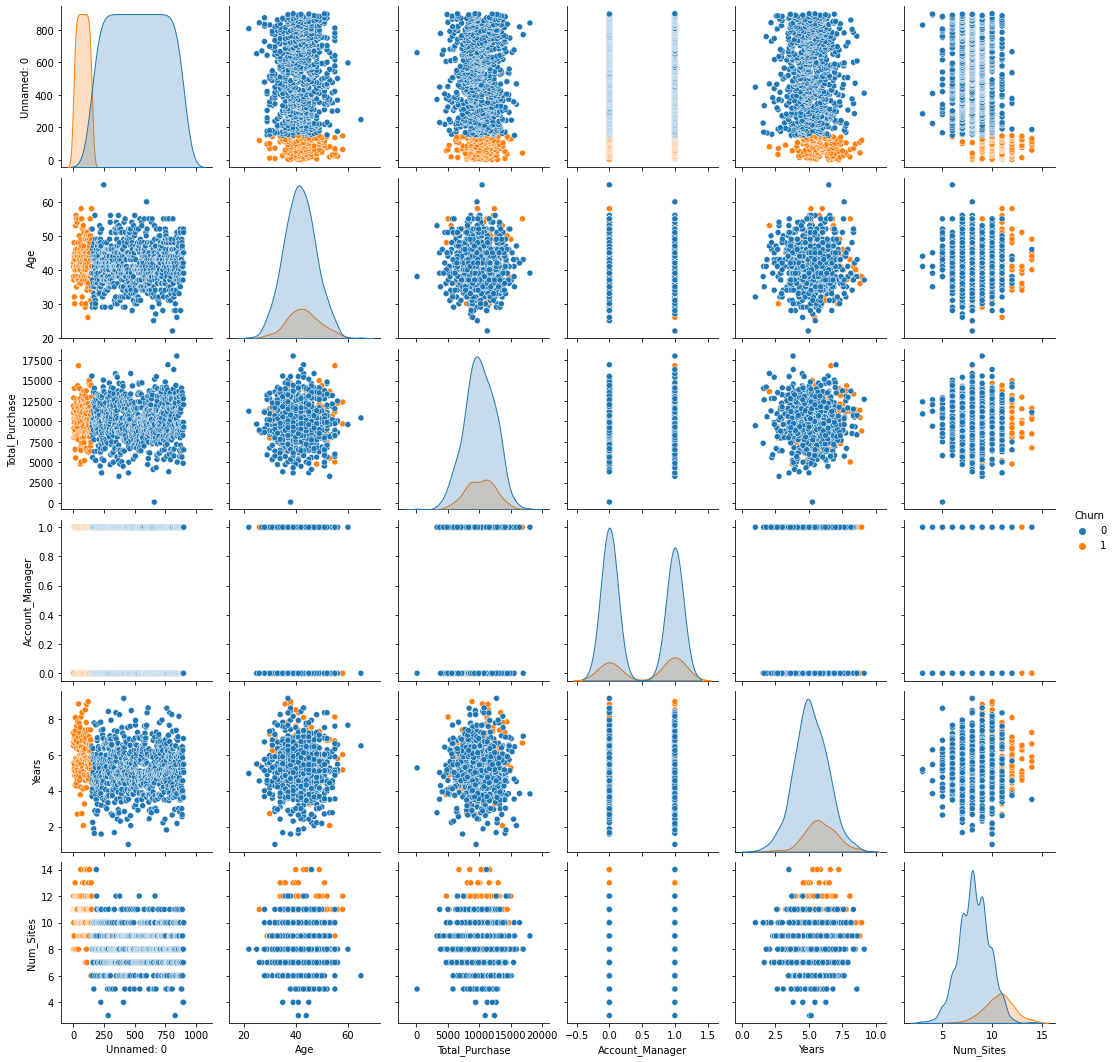

In [12]:
sns.pairplot(df,hue="Churn");

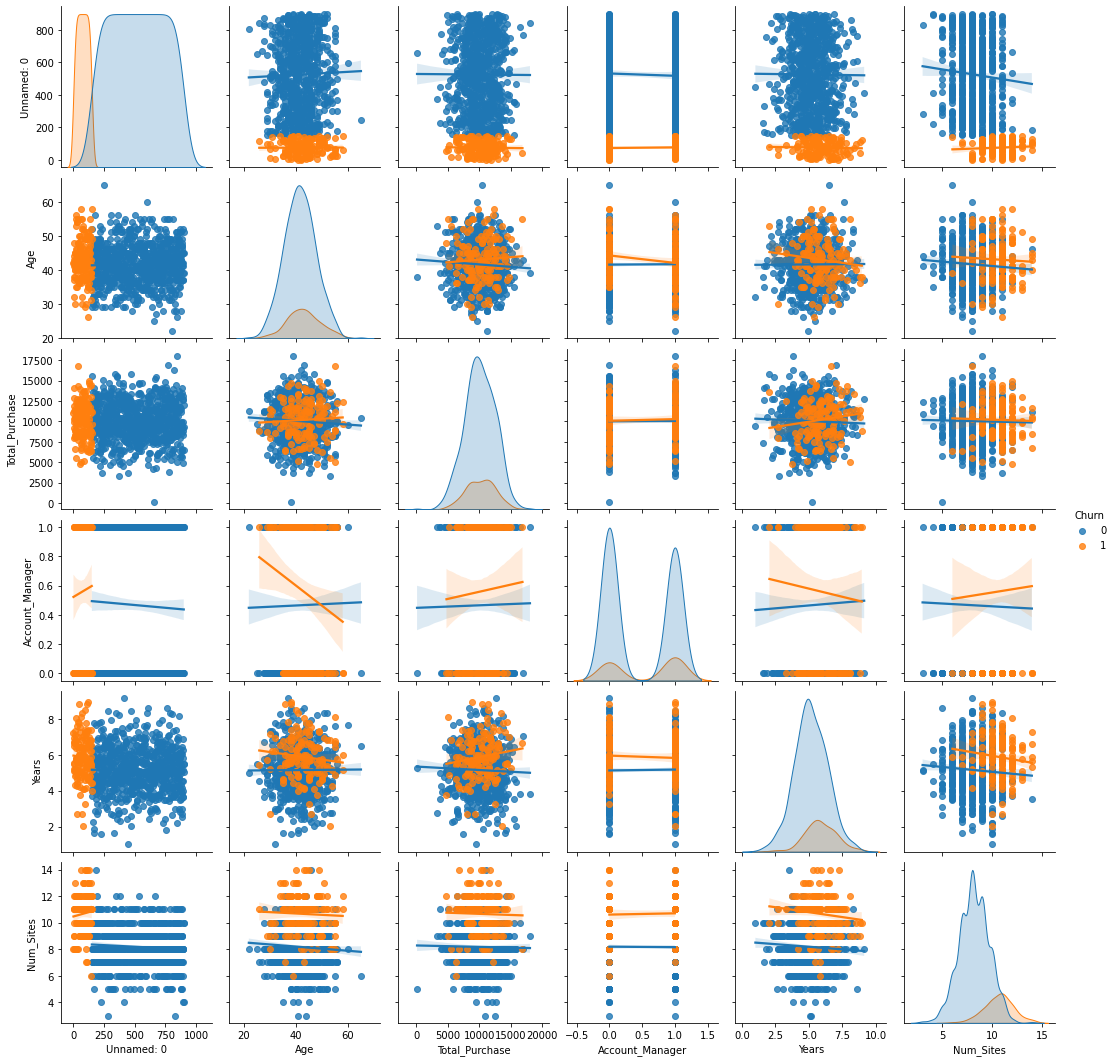

In [13]:
sns.pairplot(df,hue="Churn",kind="reg");

# Feauture Engineering

In [14]:

df.drop(['Unnamed: 0','Names'],axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              900 non-null    float64
 1   Total_Purchase   900 non-null    float64
 2   Account_Manager  900 non-null    int64  
 3   Years            900 non-null    float64
 4   Num_Sites        900 non-null    float64
 5   Churn            900 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 42.3 KB


In [15]:

df['Account_Manager']=df['Account_Manager'].astype(float)
df['Churn']=df['Churn'].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              900 non-null    float64
 1   Total_Purchase   900 non-null    float64
 2   Account_Manager  900 non-null    float64
 3   Years            900 non-null    float64
 4   Num_Sites        900 non-null    float64
 5   Churn            900 non-null    float64
dtypes: float64(6)
memory usage: 42.3 KB


In [17]:
df.to_csv('churn2.csv')

PySpark

In [18]:
from __future__ import print_function

In [19]:
spark=SparkSession.builder.getOrCreate()

In [20]:
inputlines=df = spark.read.options(header = True, inferSchema = True).csv("churn2.csv")

In [21]:
inputlines

DataFrame[_c0: int, Age: double, Total_Purchase: double, Account_Manager: double, Years: double, Num_Sites: double, Churn: double]

In [22]:
df=inputlines.rdd.map(lambda x: x.split(","))

In [23]:
df

PythonRDD[15] at RDD at PythonRDD.scala:53

In [24]:
colnames=['Age','Total_Purchase','Account_Manager','Years','Num_Sites','Churn']

In [25]:
df1 = inputlines
df1

DataFrame[_c0: int, Age: double, Total_Purchase: double, Account_Manager: double, Years: double, Num_Sites: double, Churn: double]

In [26]:
from  pyspark.ml.feature import VectorAssembler

In [27]:
vecAssembler = VectorAssembler(inputCols=['Age','Total_Purchase','Account_Manager','Years','Num_Sites'], outputCol="features")
df1= vecAssembler.transform(df1)
df1

DataFrame[_c0: int, Age: double, Total_Purchase: double, Account_Manager: double, Years: double, Num_Sites: double, Churn: double, features: vector]

In [28]:
df1 = df1.drop("index", 'Age','Total_Purchase','Account_Manager','Years','Num_Sites')
df1

DataFrame[_c0: int, Churn: double, features: vector]

In [29]:
df1 = df1.withColumnRenamed("Churn", "label")
df1

DataFrame[_c0: int, label: double, features: vector]

In [30]:
trainTest=df1.randomSplit([0.5,0.5])
trainingDF=trainTest[0]
testDF=trainTest[1]

In [31]:
trainingDF

DataFrame[_c0: int, label: double, features: vector]

In [32]:
testDF

DataFrame[_c0: int, label: double, features: vector]

Classification

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


In [34]:
from pyspark.ml.classification import GBTClassifier

In [35]:
gbt=GBTClassifier(featuresCol='features',maxIter=10)

In [36]:
gbt = gbt.fit(trainingDF)

In [37]:
predictions = gbt.transform(testDF)
predictions.show()

+---+-----+--------------------+--------------------+--------------------+----------+
|_c0|label|            features|       rawPrediction|         probability|prediction|
+---+-----+--------------------+--------------------+--------------------+----------+
|  0|  1.0|[42.0,11066.8,0.0...|[1.31367885623651...|[0.93260165601904...|       0.0|
|  1|  1.0|[41.0,11916.22,0....|[-0.8696078425359...|[0.14941258450447...|       1.0|
|  5|  1.0|[48.0,10356.02,0....|[1.31367885623651...|[0.93260165601904...|       0.0|
|  6|  1.0|[44.0,11331.58,1....|[-0.7103456242024...|[0.19455324052127...|       1.0|
|  7|  1.0|[32.0,9885.12,1.0...|[0.51405706189299...|[0.73655011607334...|       0.0|
| 13|  1.0|[40.0,8283.32,1.0...|[-1.1904870588153...|[0.08463506837405...|       1.0|
| 14|  1.0|[41.0,6569.87,1.0...|[1.52295342722370...|[0.95460548442801...|       0.0|
| 15|  1.0|[38.0,10494.82,1....|[-1.2737534162280...|[0.07259415722843...|       1.0|
| 16|  1.0|[45.0,8213.41,1.0...|[-0.8659498992108...|[

In [38]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8633257403189066


PYCARET

In [39]:
#!pip install pycaret

In [40]:
#!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

In [41]:

#!pip install --user pycaret

In [42]:
#!pip uninstall scikit-learn -y
#!pip install scikit-learn==0.23.1

In [43]:

from pycaret.datasets import get_data
from pycaret.classification import *

In [44]:
df=pd.read_csv("churn2.csv")

In [45]:
clf=setup(data=df, target='Churn', session_id=1
229, normalize=True)

,Description,Value
0,session_id,1229
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(900, 7)"
5,Missing Values,0
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,0
9,High Cardinality Features,0


In [46]:
best_model=compare_models(sort='AUC')   # AUC Area under the curve

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8918,0.8946,0.5391,0.7208,0.6062,0.5485,0.5598,0.0060
lr,Logistic Regression,0.8934,0.8922,0.5382,0.7284,0.6071,0.5507,0.5634,0.7840
nb,Naive Bayes,0.8855,0.8919,0.4918,0.7156,0.5719,0.5119,0.5277,0.0060
qda,Quadratic Discriminant Analysis,0.8998,0.8785,0.5691,0.7640,0.6456,0.5899,0.6018,0.0060
gbc,Gradient Boosting Classifier,0.8728,0.8530,0.4827,0.6615,0.5519,0.4808,0.4921,0.0380
lightgbm,Light Gradient Boosting Machine,0.8616,0.8375,0.4900,0.5767,0.5240,0.4463,0.4505,0.0230
xgboost,Extreme Gradient Boosting,0.8633,0.8350,0.4918,0.5870,0.5331,0.4550,0.4581,0.0670
rf,Random Forest Classifier,0.8680,0.8344,0.4364,0.6339,0.5129,0.4418,0.4534,0.0950
et,Extra Trees Classifier,0.8554,0.8235,0.4082,0.5727,0.4736,0.3945,0.4028,0.0820
ada,Ada Boost Classifier,0.8855,0.8053,0.5209,0.7419,0.5833,0.5232,0.5435,0.0360


In [47]:
lr=create_model('lr', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.9598,0.8182,0.9000,0.8571,0.8286,0.8300
1,0.8730,0.8794,0.4545,0.7143,0.5556,0.4857,0.5026
2,0.9524,0.9318,0.7273,1.0000,0.8421,0.8149,0.8292
3,0.8254,0.8357,0.3636,0.5000,0.4211,0.3213,0.3269
4,0.9524,0.9720,0.8182,0.9000,0.8571,0.8286,0.8300
5,0.8889,0.9245,0.6000,0.6667,0.6316,0.5664,0.5675
6,0.8413,0.8151,0.1000,0.5000,0.1667,0.1201,0.1691
7,0.9048,0.9434,0.5000,0.8333,0.6250,0.5743,0.5989
8,0.8889,0.7623,0.5000,0.7143,0.5882,0.5263,0.5375


In [48]:
gbc=create_model('gbc', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9206,0.9441,0.7273,0.8000,0.7619,0.7144,0.7156
1,0.8413,0.8392,0.3636,0.5714,0.4444,0.3571,0.3696
2,0.9365,0.9266,0.7273,0.8889,0.8000,0.7627,0.7681
3,0.8254,0.8112,0.3636,0.5000,0.4211,0.3213,0.3269
4,0.9048,0.9615,0.5455,0.8571,0.6667,0.6143,0.6357
5,0.8889,0.9019,0.6000,0.6667,0.6316,0.5664,0.5675
6,0.8254,0.6887,0.2000,0.4000,0.2667,0.1799,0.1939
7,0.9206,0.8340,0.5000,1.0000,0.6667,0.6272,0.6759
8,0.8095,0.7887,0.3000,0.3750,0.3333,0.2238,0.2257


In [49]:
xgb=create_model('xgboost', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9371,0.6364,0.7000,0.6667,0.6002,0.6012
1,0.8571,0.8059,0.4545,0.6250,0.5263,0.4447,0.4525
2,0.9206,0.8881,0.7273,0.8000,0.7619,0.7144,0.7156
3,0.8095,0.7675,0.2727,0.4286,0.3333,0.2286,0.2365
4,0.9206,0.9073,0.7273,0.8000,0.7619,0.7144,0.7156
5,0.8730,0.8755,0.6000,0.6000,0.6000,0.5245,0.5245
6,0.7778,0.6925,0.1000,0.1667,0.1250,0.0068,0.0070
7,0.9048,0.8415,0.6000,0.7500,0.6667,0.6119,0.6171
8,0.8095,0.7849,0.3000,0.3750,0.3333,0.2238,0.2257


In [50]:
blend_specific_soft=blend_models(estimator_list=[lr,gbc,xgb], method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9206,0.9510,0.7273,0.8000,0.7619,0.7144,0.7156
1,0.8571,0.8479,0.4545,0.6250,0.5263,0.4447,0.4525
2,0.9365,0.9248,0.7273,0.8889,0.8000,0.7627,0.7681
3,0.8254,0.8147,0.3636,0.5000,0.4211,0.3213,0.3269
4,0.9365,0.9615,0.7273,0.8889,0.8000,0.7627,0.7681
5,0.8889,0.9170,0.6000,0.6667,0.6316,0.5664,0.5675
6,0.8095,0.7547,0.1000,0.2500,0.1429,0.0574,0.0650
7,0.9206,0.9075,0.6000,0.8571,0.7059,0.6617,0.6757
8,0.8413,0.7792,0.4000,0.5000,0.4444,0.3532,0.3562


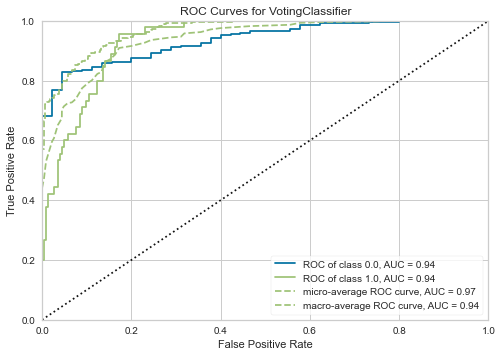

In [51]:
plot_model(blend_specific_soft)